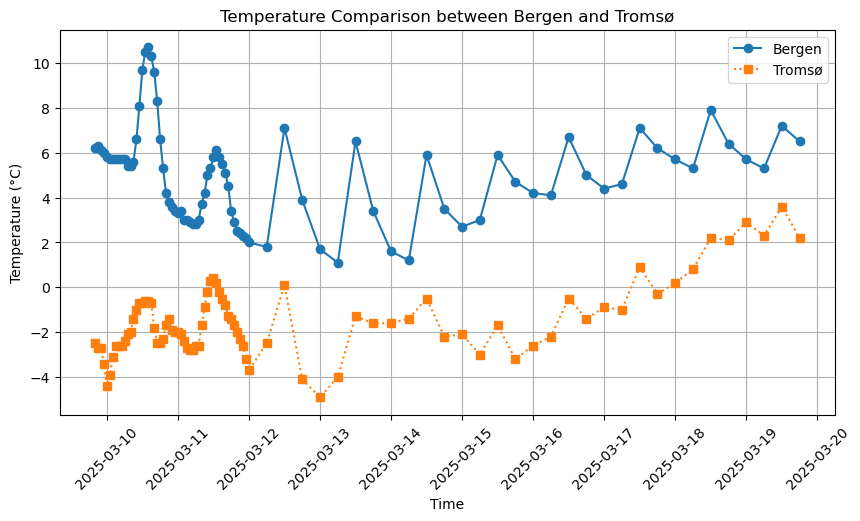

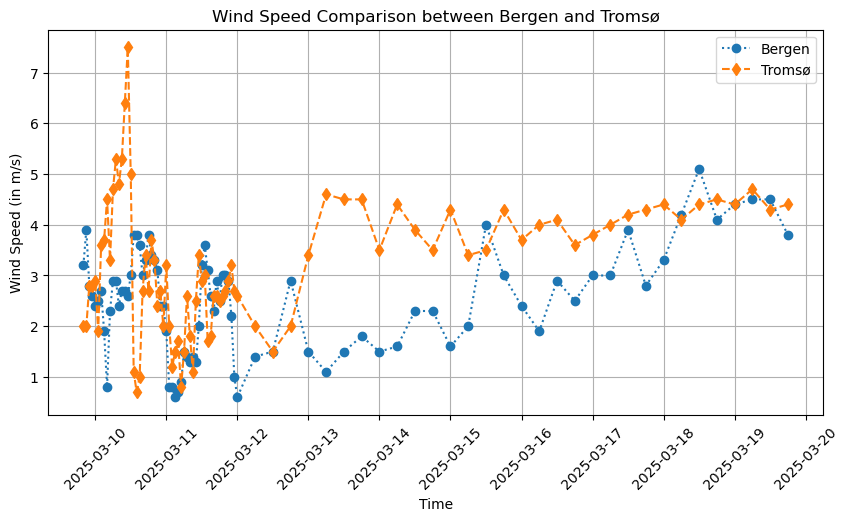

In [9]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Function to get the temperature data (using latitude and longitude)
def fetch_temperature(lat, lon):
    url = f"https://api.met.no/weatherapi/locationforecast/2.0/compact?lat={lat}&lon={lon}"
    headers = {"User-Agent": "MyWeatherApp (puneet.sharma@uit.no)"}  # Replace with your email
    # try except block for better debugging
    try:
        response = requests.get(url, headers=headers)    
        if response.status_code == 200:
            data = response.json()
            timeseries = data["properties"]["timeseries"]
        
            # Extract time and temperature
            timestamps = [datetime.strptime(entry["time"], "%Y-%m-%dT%H:%M:%SZ") for entry in timeseries]
            temperatures = np.array([entry["data"]["instant"]["details"]["air_temperature"] for entry in timeseries])
            relative_humidity = np.array([entry["data"]["instant"]["details"]["relative_humidity"] for entry in timeseries])
            wind_speed = np.array([entry["data"]["instant"]["details"]["wind_speed"] for entry in timeseries])
        
            return timestamps, temperatures, relative_humidity, wind_speed
        else:
            print(f"Failed to fetch data: {response.status_code}")
            return None, None, None, None
    
    except:
        print(f"Error fetching data")
        return None, None, None, None
    

# Define two locations 
location1 = {"name": "Bergen", "lat": 60.3913, "lon": 5.3221}
location2 = {"name": "Tromsø", "lat": 69.6492, "lon": 18.9553}

# Fetch data for both locations
timestamps1, temperatures1, relative_humidity1, wind_speed1 = fetch_temperature(location1["lat"], location1["lon"])
timestamps2, temperatures2, relative_humidity2, wind_speed2 = fetch_temperature(location2["lat"], location2["lon"])

# Plot the temperature trends
plt.figure(figsize=(10, 5))
plt.plot(timestamps1, temperatures1, label=location1["name"], marker='o', linestyle='-')
plt.plot(timestamps2, temperatures2, label=location2["name"], marker='s', linestyle=':')

# Formatting the plot
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Comparison between Bergen and Tromsø")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
# Show the plot
plt.show()


# Plot the wind trends
plt.figure(figsize=(10, 5))
plt.plot(timestamps1, wind_speed1, label=location1["name"], marker='o', linestyle=':')
plt.plot(timestamps2, wind_speed2, label=location2["name"], marker='d', linestyle='--')
# Formatting the plot
plt.xlabel("Time")
plt.ylabel("Wind Speed (in m/s)")
plt.title("Wind Speed Comparison between Bergen and Tromsø")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


